Try efficientdet-pytorch's

In [1]:
from PIL import Image, ImageFont, ImageDraw
import requests
import numpy as np
from io import BytesIO
from lsj_efficientdet_pytorch import RandomResizePad, ResizePad

In [2]:
image_buffer = requests.get("https://farm9.staticflickr.com/8368/8446497097_62cb019310_z.jpg").content
image = Image.open(BytesIO(image_buffer))

In [3]:
image.size

(640, 480)

In [4]:
# yxyx
bbox = np.array([[0, 0, 480-1, 640-1]], dtype=np.float32)
line_width = 3

def plot_bbox_pil(image, bbox, bbox_type):
    source_img = image.copy()
    
    draw = ImageDraw.Draw(source_img)
    for i, bbox_ in enumerate(bbox):
        if bbox_type == "yxyx":
            slice_ = [1,0,3,2]
        elif bbox_type == "xyxy":
            slice_ = [0,1,2,3]
        draw.rectangle(bbox_[slice_].tolist(), outline='red', width=line_width)
        # y, x
        if bbox_type == "xyxy":
            x = bbox_[0]
            y = bbox_[1]
        elif bbox_type == "yxyx":
            x = bbox_[1]
            y = bbox_[0]
        draw.text((x + line_width, y + line_width), f"bbox_{i}", fill='yellow')
    
    return source_img

plot_bbox_img = plot_bbox_pil(image, bbox, "yxyx")

In [5]:
# plot_bbox_img

In [6]:
# test LSJ from effcient pytorch

# target_size = (1024, 1024)
target_size= 512
interpolation = "bilinear"

T_efficient = RandomResizePad(target_size=target_size, interpolation=interpolation)

0 24 512 507


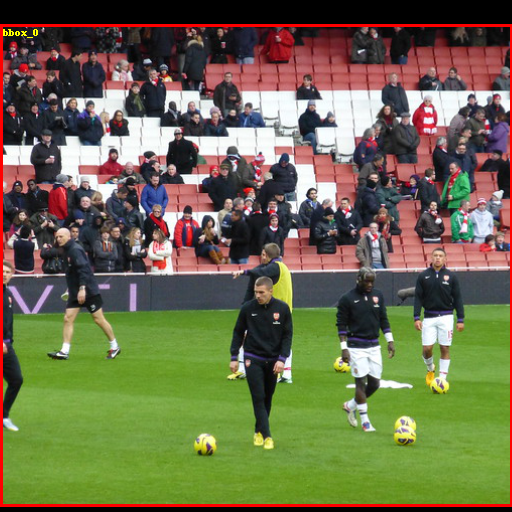

In [7]:
cls = np.ones(len(bbox))
anno = dict(bbox=bbox.copy(), cls=cls)  # The bbox is modified in place
new_img, new_anno = T_efficient(image, anno)

plot_lsj_bbox_img = plot_bbox_pil(new_img, new_anno['bbox'], "yxyx")
plot_lsj_bbox_img

In [8]:
bbox, new_anno['bbox'], anno['bbox']  # in-place modification of input `anno`

(array([[  0.,   0., 479., 639.]], dtype=float32),
 array([[ 24.     ,   0.     , 506.78415, 512.     ]], dtype=float32),
 array([[ 24.     ,   0.     , 506.78415, 512.     ]], dtype=float32))

Try GRiT's

In [9]:
from lsj_grit import EfficientDetResizeCrop
from transforms.augmentation import AugInput

391 154 1.46801367633925
(512, 512) [[  0.   0. 639. 479.]] [[-391.     -154.      547.0607  549.1785]]


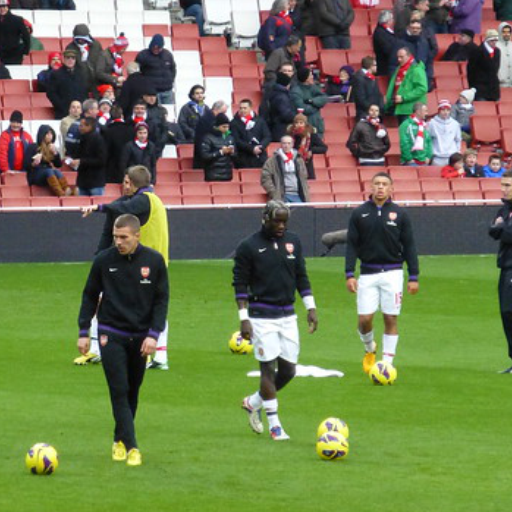

In [10]:
T_grit = EfficientDetResizeCrop(512, (0.2, 2.0))
# xyxy
bbox = np.array([[0, 0, 640-1, 480-1]], dtype=np.float32)

np_image = np.array(image)
tfm = T_grit.get_transform(np_image)
new_image = tfm.apply_image(np_image)
new_bbox = tfm.apply_box(bbox)
pil_new_image = Image.fromarray(new_image)
plot_grit_lsj_bbox_img = plot_bbox_pil(pil_new_image, new_bbox, "xyxy")

print(tfm.offset_x, tfm.offset_y, tfm.img_scale)
print(pil_new_image.size, bbox, new_bbox)
plot_grit_lsj_bbox_img

Try detectron2's

In [11]:
from transforms import ResizeScale, FixedSizeCrop, apply_transform_gens

(512, 512) [[  0.   0. 639. 479.]] [[-289.      -136.       675.4906   587.48956]]


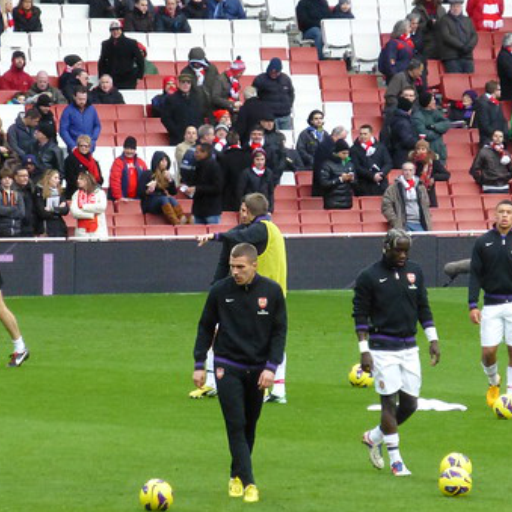

In [19]:
aug = [ResizeScale(min_scale=0.1, max_scale=2.0, target_height=512, target_width=512), FixedSizeCrop(crop_size=(512, 512))]

# xyxy
bbox = np.array([[0, 0, 640-1, 480-1]], dtype=np.float32)

np_image = np.array(image)
new_image, transforms = apply_transform_gens(aug, np_image)
new_bbox = transforms.apply_box(bbox)

pil_new_image = Image.fromarray(new_image)
plot_grit_lsj_bbox_img = plot_bbox_pil(pil_new_image, new_bbox, "xyxy")

print(pil_new_image.size, bbox, new_bbox)
plot_grit_lsj_bbox_img